In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import f_classif, chi2, f_regression
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler

In [31]:
cols=[*range(1, 75, 1)]
df = pd.read_csv('descriptors_class.csv', sep=',',usecols=cols)
df.head()

,NumTiny,NumSmall,NumAliphatic,NumAromatic,NumNonPolar,NumPolar,NumCharged,NumBasic,NumAcidic,PorcTiny,...,z3,z4,z5,HydrophobicityIndex,AlphaAndTurnPropensities,BulkyProperties,CompositionalCharacteristicIndex,LocalFlexibility,ElectronicProperties,Class
0,7,9,2,2,9,6,3,3,0,46.667,...,0.116667,0.012000,0.135333,-0.131200,-0.496267,-0.390267,0.344133,-0.027733,0.070467,0
1,2,8,7,1,9,11,8,5,3,10.000,...,-0.886500,-0.432500,0.424500,-0.549750,0.241050,0.070800,0.538100,-0.101200,0.167500,0
2,3,7,3,4,7,7,4,3,1,21.429,...,-0.035000,0.270000,0.197143,-0.200571,-0.297643,0.048500,0.056857,0.027500,-0.098857,0
3,5,5,5,2,10,1,1,0,1,45.455,...,-0.056364,-0.645455,0.120909,0.472000,-0.076455,-0.214000,0.908545,-0.238818,-0.478000,0
4,4,8,5,0,6,8,4,1,3,28.571,...,-0.797857,-1.222143,0.140000,-0.352071,0.083857,-0.171071,0.529786,-0.098643,0.007786,0


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 74 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NumTiny                           796 non-null    int64  
 1   NumSmall                          796 non-null    int64  
 2   NumAliphatic                      796 non-null    int64  
 3   NumAromatic                       796 non-null    int64  
 4   NumNonPolar                       796 non-null    int64  
 5   NumPolar                          796 non-null    int64  
 6   NumCharged                        796 non-null    int64  
 7   NumBasic                          796 non-null    int64  
 8   NumAcidic                         796 non-null    int64  
 9   PorcTiny                          796 non-null    float64
 10  PorcSmall                         796 non-null    float64
 11  PorcAliphatic                     796 non-null    float64
 12  PorcArom

In [33]:
df['at_mw']

0      1596.82714
1      2372.75304
2      1666.85644
3      1094.27544
4      1531.72334
          ...    
791    1570.65064
792    1776.88574
793    1635.92364
794    1615.02404
795    1607.95184
Name: at_mw, Length: 796, dtype: float64

In [34]:
df.iloc[0:5,21:41]

,at_pi,at_lengthpep,at_mw,at_hmoment_alpha,at_hmoment_sheet,HelixBendPreference,SideChainSize,ExtendedStructurePreference,Hidrophobicity,DoubleBendPreference,PartialSpecificVolume,FlatExtendedPreference,OccurrenceInAlphaRegion,pKC,SurroundingHidrophobicity,Blosum1,Blosum2,Blosum3,Blosum4,Blosum5
0,11.481193,15,1596.82714,0.307296,0.568755,0.426667,-0.378667,-0.040667,0.038667,-0.178000,-0.267333,0.466667,0.234667,0.007333,0.136000,0.275333,-0.092000,0.295333,0.057333,0.134000
1,10.114526,20,2372.75304,0.526967,0.691329,-0.171000,0.064000,-0.008500,0.408000,-0.125000,-0.665000,0.273000,0.122000,0.087000,0.234000,0.301000,-0.183000,-0.411000,-0.078500,0.099500
2,7.704747,14,1666.85644,0.196790,0.267704,0.308571,0.015000,0.083571,-0.027143,0.210000,-0.200000,-0.422857,0.054286,-0.036429,0.192857,0.120000,0.171429,-0.078571,0.192143,-0.149286
3,3.849974,11,1094.27544,0.324373,0.138449,-0.282727,-0.671818,-0.147273,-0.486364,-0.369091,-0.463636,0.385455,0.887273,0.025455,-0.291818,-0.307273,-0.200000,0.232727,0.158182,-0.338182
4,3.876003,14,1531.72334,0.365818,0.162795,-0.202857,-0.356429,0.420714,0.277143,-0.095714,-0.244286,-0.129286,-0.012857,-0.130714,-0.053571,0.117143,-0.506429,-0.220714,-0.012857,-0.271429


In [35]:
#hola2=pd.isnull(df).any()
#hola2

In [36]:
df.describe()

,NumTiny,NumSmall,NumAliphatic,NumAromatic,NumNonPolar,NumPolar,NumCharged,NumBasic,NumAcidic,PorcTiny,...,z3,z4,z5,HydrophobicityIndex,AlphaAndTurnPropensities,BulkyProperties,CompositionalCharacteristicIndex,LocalFlexibility,ElectronicProperties,Class
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,...,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,4.763819,8.292714,4.135678,1.827889,8.149497,7.963568,3.871859,2.065327,1.806533,29.565295,...,-0.209597,-0.460322,0.205312,-0.209793,-0.070120,-0.126753,0.300114,-0.019622,-0.030166,0.678392
std,2.527732,3.445314,2.222058,1.389729,3.423781,3.760761,2.464064,1.592673,1.621478,12.126082,...,0.453423,0.374260,0.238628,0.271016,0.286095,0.221808,0.233241,0.204194,0.258565,0.467387
min,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.495714,-1.571429,-0.513333,-0.722143,-0.938429,-0.886643,-0.515625,-0.537000,-0.711643,0.000000
25%,3.000000,6.000000,3.000000,1.000000,6.000000,6.000000,2.000000,1.000000,1.000000,21.429000,...,-0.536786,-0.697893,0.058750,-0.408694,-0.267163,-0.275036,0.140375,-0.140920,-0.199607,0.000000
50%,4.000000,8.000000,4.000000,2.000000,7.000000,7.000000,3.000000,2.000000,2.000000,28.571000,...,-0.219286,-0.460714,0.221700,-0.238681,-0.090143,-0.112952,0.311911,-0.024821,-0.037786,1.000000
75%,6.000000,10.000000,5.000000,3.000000,9.000000,9.000000,5.000000,3.000000,3.000000,35.714000,...,0.116488,-0.204821,0.357464,-0.070179,0.134357,0.024554,0.449982,0.102643,0.127946,1.000000
max,18.000000,29.000000,19.000000,7.000000,29.000000,31.000000,19.000000,13.000000,11.000000,64.286000,...,1.145714,0.624444,0.890000,0.908643,0.739727,0.508600,0.990900,0.873222,0.965643,1.000000


In [37]:
df['Class'].value_counts()

1    540
0    256
Name: Class, dtype: int64

In [38]:
from sklearn import preprocessing #module includes scaling, centering, normalization, binarization methods.
label_encoder = preprocessing.LabelEncoder() #Encode target labels with value between 0 and n_classes-1. Para valores str
df['Class']= label_encoder.fit_transform(df['Class']) #Fit label encoder and return encoded labels.
print(df['Class'])
df

0      0
1      0
2      0
3      0
4      0
      ..
791    1
792    1
793    1
794    1
795    1
Name: Class, Length: 796, dtype: int64


,NumTiny,NumSmall,NumAliphatic,NumAromatic,NumNonPolar,NumPolar,NumCharged,NumBasic,NumAcidic,PorcTiny,...,z3,z4,z5,HydrophobicityIndex,AlphaAndTurnPropensities,BulkyProperties,CompositionalCharacteristicIndex,LocalFlexibility,ElectronicProperties,Class
0,7,9,2,2,9,6,3,3,0,46.667,...,0.116667,0.012000,0.135333,-0.131200,-0.496267,-0.390267,0.344133,-0.027733,0.070467,0
1,2,8,7,1,9,11,8,5,3,10.000,...,-0.886500,-0.432500,0.424500,-0.549750,0.241050,0.070800,0.538100,-0.101200,0.167500,0
2,3,7,3,4,7,7,4,3,1,21.429,...,-0.035000,0.270000,0.197143,-0.200571,-0.297643,0.048500,0.056857,0.027500,-0.098857,0
3,5,5,5,2,10,1,1,0,1,45.455,...,-0.056364,-0.645455,0.120909,0.472000,-0.076455,-0.214000,0.908545,-0.238818,-0.478000,0
4,4,8,5,0,6,8,4,1,3,28.571,...,-0.797857,-1.222143,0.140000,-0.352071,0.083857,-0.171071,0.529786,-0.098643,0.007786,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,5,9,3,1,6,8,4,1,3,35.714,...,0.291429,-0.967143,0.135000,-0.238786,-0.247143,-0.305071,0.084929,-0.296429,-0.207214,1
792,1,6,3,3,5,9,6,3,3,7.143,...,-0.235000,-0.346429,0.350714,-0.565714,0.153500,0.099357,0.025929,-0.126286,0.040286,1
793,3,5,4,2,8,6,5,3,2,21.429,...,-0.657857,-0.273571,-0.027143,-0.258857,-0.058071,0.120786,0.474000,-0.304786,-0.021000,1
794,5,6,7,3,12,2,0,0,0,35.714,...,0.262857,-0.195000,-0.176429,0.704643,0.334357,0.178000,0.370357,-0.090286,0.094786,1


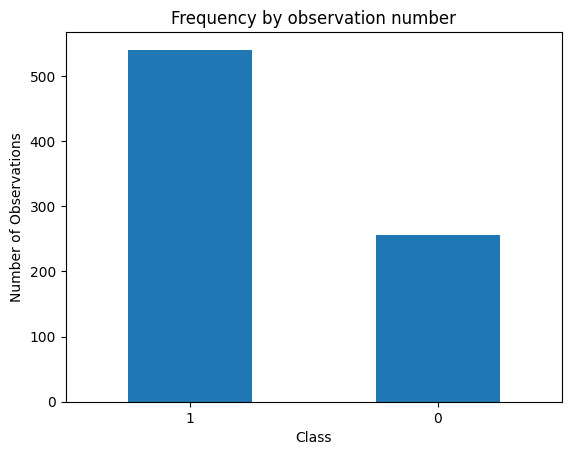

In [39]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");
hola=[]

In [40]:
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
X=df[feature_cols]
Y=df.Class


In [41]:
asel = SelectKBest(f_classif, k=50)
asel.fit(X,Y)
amask_att = asel.get_support()
amask_att
Select = X.columns[amask_att]
Select


Index(['PorcSmall', 'PorcAromatic', 'PorcCharged', 'PorcBasic', 'PorcAcidic',
       'at_boman', 'at_charge', 'at_pi', 'at_hmoment_alpha',
       'at_hmoment_sheet', 'HelixBendPreference', 'SideChainSize',
       'ExtendedStructurePreference', 'Hidrophobicity', 'DoubleBendPreference',
       'PartialSpecificVolume', 'FlatExtendedPreference',
       'OccurrenceInAlphaRegion', 'pKC', 'SurroundingHidrophobicity',
       'Blosum3', 'Blosum4', 'Blosum5', 'Blosum6', 'Blosum7', 'Blosum8',
       'Blosum9', 'Blosum10', 'MsWhim1', 'MsWhim2', 'MsWhim3', 'st2', 'st4',
       'st5', 'st6', 'st7', 'st8', 't1', 't2', 't3', 't5', 'z1', 'z3', 'z4',
       'HydrophobicityIndex', 'AlphaAndTurnPropensities', 'BulkyProperties',
       'CompositionalCharacteristicIndex', 'LocalFlexibility',
       'ElectronicProperties'],
      dtype='object')

In [42]:
X=df[Select]
Y=df.Class
X_p=preprocessing.normalize(X)
#print(X_p)

In [43]:
#print(Y)

# Random Forest Sin balanceo

In [44]:

V_range = list(range(1, 11))
Acc = []
Rec = []
Pre = []
dtree=RandomForestClassifier(n_estimators=100,class_weight="balanced")
for k in V_range:
    X_train, X_test, y_train, y_test = train_test_split(X_p,Y, test_size=0.20)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    Acc.append(metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
    Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
print('---------------------------------------------------')
print(" Comportamiento promedio de Accuracy: ", np.mean(Acc),"STD",np.std(Acc))
print(" Comportamiento promedio de Recall: ", np.mean(Rec),"STD",np.std(Rec))
print(" Comportamiento promedio de Precisión: ", np.mean(Pre),"STD",np.std(Pre))


[[ 20  23]
 [  2 115]]
[[ 22  27]
 [  2 109]]
[[ 22  33]
 [  0 105]]
[[36 23]
 [ 2 99]]
[[ 17  29]
 [  4 110]]
[[ 27  30]
 [  0 103]]
[[ 23  33]
 [  2 102]]
[[ 24  24]
 [  4 108]]
[[ 23  14]
 [  0 123]]
[[ 33  26]
 [  1 100]]
---------------------------------------------------
 Comportamiento promedio de Accuracy:  0.8256249999999999 STD 0.035294519758738756
 Comportamiento promedio de Recall:  0.9845152220347636 STD 0.012592456737770005
 Comportamiento promedio de Precisión:  0.8038150279688738 STD 0.039079006656987575


In [45]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler()
X_Smo,y_Smo=ros.fit_resample(X_p,Y)
y_Smo.value_counts()

0    540
1    540
Name: Class, dtype: int64

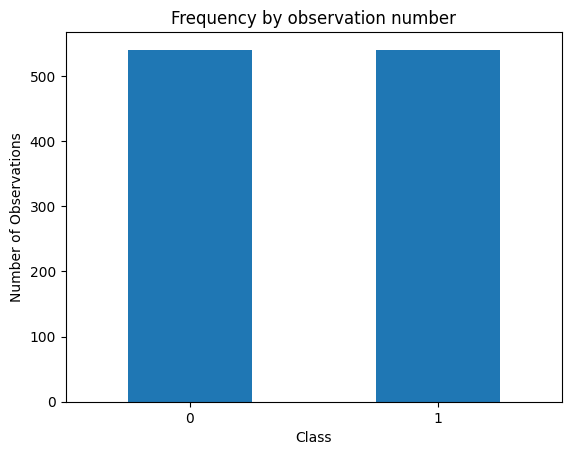

In [46]:
count_classes = y_Smo.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

# Random Forest Con balanceo

In [47]:
ros = RandomOverSampler()
X_Smo,y_Smo=ros.fit_resample(X_p,Y)

V_range = list(range(1, 11))
Acc = []
Rec = []
Pre = []
dtree=RandomForestClassifier(n_estimators=100,class_weight="balanced")
for k in V_range:
    X_train, X_test, y_train, y_test = train_test_split(X_Smo,y_Smo, test_size=0.20)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    Acc.append(metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
    Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
print('---------------------------------------------------')
print(" Comportamiento promedio de Accuracy: ", np.mean(Acc),"STD",np.std(Acc))
print(" Comportamiento promedio de Recall: ", np.mean(Rec),"STD",np.std(Rec))
print(" Comportamiento promedio de Precisión: ", np.mean(Pre),"STD",np.std(Pre))
print(X_Smo)

[[100   8]
 [  4 104]]
[[ 95  11]
 [  3 107]]
[[ 95  10]
 [  6 105]]
[[100   9]
 [  5 102]]
[[ 94  11]
 [  4 107]]
[[ 94   4]
 [  9 109]]
[[ 93  11]
 [  5 107]]
[[100   3]
 [  4 109]]
[[104   9]
 [  6  97]]
[[ 93   7]
 [  4 112]]
---------------------------------------------------
 Comportamiento promedio de Accuracy:  0.938425925925926 STD 0.012081470695092474
 Comportamiento promedio de Recall:  0.9549823714160344 STD 0.013781972242778492
 Comportamiento promedio de Precisión:  0.9274959674638732 STD 0.023192789005819517
[[ 8.69957905e-01  1.93319146e-01  2.89985968e-01 ...  4.98969190e-03
  -4.02113876e-04  1.02171723e-03]
 [ 6.16357017e-01  7.70446271e-02  6.16357017e-01 ...  8.29154277e-03
  -1.55938325e-03  2.58099501e-03]
 [ 7.27855084e-01  4.15910952e-01  4.15910952e-01 ...  8.27675209e-04
   4.00320296e-04 -1.43907348e-03]
 ...
 [ 8.86653152e-01  0.00000000e+00  2.95551051e-01 ...  8.95519684e-03
   7.21144564e-04  6.50655638e-03]
 [ 7.01991853e-01  4.09495248e-01  4.67994569e

# N árboles

In [48]:
V_range = list(range(0, 10))
t_range = list(range(0,4))
t_velues=[1,10,100,1000,10000]
t_velues2=['1','10','100','1000','10000']
t_scores=[]
for j in t_range:
    Acc = []
    Rec = []
    Pre = []
    print(j)
    print(t_velues[j])
    for k in V_range:
        X_train, X_test, y_train, y_test = train_test_split(X_Smo,y_Smo, test_size=0.20)
        dtree=RandomForestClassifier(n_estimators=t_velues[j])
        dtree.fit(X_train,y_train)
        y_pred = dtree.predict(X_test)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        print(confusion_matrix(y_test,y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    t_scores.append(np.mean(Acc))
    print('---------------------------------------------------')
    print(" Accuracy: ", np.mean(Acc),"STD",np.std(Acc))
    print(" Recall: ", np.mean(Rec),"STD",np.std(Rec))
    print(" Precisión: ", np.mean(Pre),"STD",np.std(Pre))
    print('---------------------------------------------------')


0
1
[[85 27]
 [19 85]]
[[87 26]
 [31 72]]
[[95 19]
 [18 84]]
[[84 29]
 [31 72]]
[[98 11]
 [23 84]]
[[85 16]
 [34 81]]
[[91 26]
 [30 69]]
[[87 20]
 [25 84]]
[[78 21]
 [31 86]]
[[93 15]
 [25 83]]
---------------------------------------------------
 Comportamiento promedio de Accuracy:  0.7791666666666668 STD 0.03879231836761893
 Comportamiento promedio de Recall:  0.7499463063924314 STD 0.04717021728923451
 Comportamiento promedio de Precisión:  0.7925974979831577 STD 0.05409462123342365
---------------------------------------------------
1
10
[[101  15]
 [  7  93]]
[[95  1]
 [21 99]]
[[103   9]
 [ 20  84]]
[[107   4]
 [  9  96]]
[[106  11]
 [ 17  82]]
[[105  10]
 [ 17  84]]
[[105   5]
 [ 12  94]]
[[96  6]
 [19 95]]
[[99  8]
 [12 97]]
[[108  14]
 [  9  85]]
---------------------------------------------------
 Comportamiento promedio de Accuracy:  0.8953703703703703 STD 0.022028476395130215
 Comportamiento promedio de Recall:  0.8651233380770874 STD 0.0419944677311687
 Comportamiento prom

[0.7791666666666668, 0.8953703703703703, 0.9449074074074073, 0.9287037037037036]
[1, 10, 100, 1000, 10000]


Text(0, 0.5, 'Accuracy')

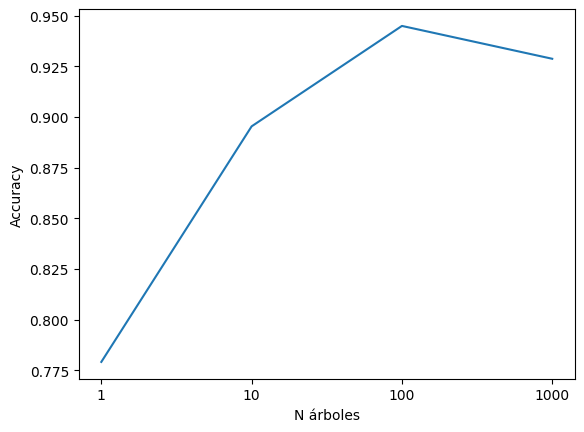

In [49]:
print(t_scores)
print(t_velues)
t_velues3=['1','10','100','1000']
plt.plot(t_velues3,t_scores)
plt.xlabel('N árboles')
plt.ylabel('Accuracy')

## Ranked List and Accumulated sequence-derived attributes ANOVA


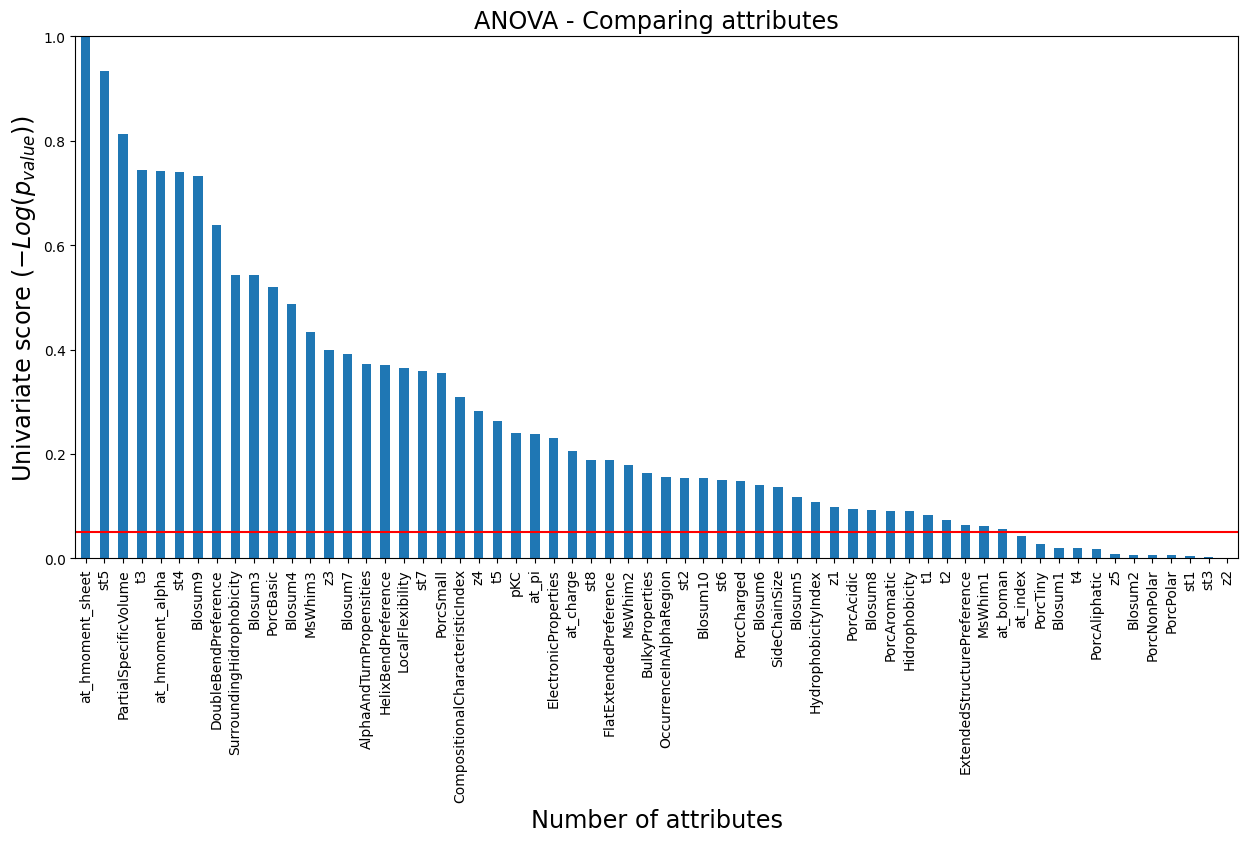

In [50]:
V_range = list(range(0, 62))

feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']

X=df[feature_cols]
X_p=preprocessing.normalize(X)

#62
#ANOVA
asel = SelectKBest(f_classif, k=5)
asel.fit(X,Y)
scores = asel.scores_[asel.get_support()]
total_f_reg=-np.log10(asel.pvalues_)
total_f_reg /= total_f_reg.max()

names_scores = list(zip(feature_cols, total_f_reg))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_reg_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_reg_Scores', 'Feat_names'], ascending = [False, True])

amask_att = asel.get_support()
amask_att
hola = X.columns[amask_att]

X_indices = np.arange(X.shape[-1])
plt.figure(figsize=(15, 9))

plt.xticks(X_indices,ns_df_sorted['Feat_names'],rotation=90)
plt.bar(X_indices, ns_df_sorted['F_reg_Scores'], label="Regression($-Log(p_{value})$)",width=0.5)
plt.axhline(y=0.05, xmin=0.0, xmax=3.5, color='red')
plt.title("ANOVA - Comparing attributes",fontsize='xx-large')
plt.xlabel("Number of attributes",fontsize='xx-large')
plt.ylabel("Univariate score ($-Log(p_{value})$)",fontsize='xx-large')

plt.subplots_adjust(bottom=0.3)
plt.margins(0.005)
plt.ylim(0, 1)
plt.savefig('ml-a-ANOVA.png')#,pad_inches=1.5)
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


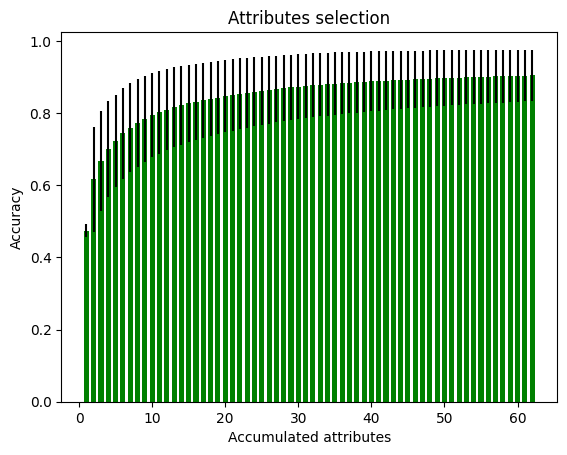

In [60]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

feature_coll =['at_hmoment_sheet','st5','PartialSpecificVolume','t3','at_hmoment_alpha','st4','Blosum9','DoubleBendPreference',
               'SurroundingHidrophobicity','Blosum3','PorcBasic','Blosum4','MsWhim3','z3','Blosum7','AlphaAndTurnPropensities',
               'HelixBendPreference','LocalFlexibility','st7','PorcSmall','CompositionalCharacteristicIndex','z4','t5','pKC','at_pi',
               'ElectronicProperties','at_charge','st8','FlatExtendedPreference','MsWhim2','BulkyProperties','OccurrenceInAlphaRegion',
               'st2','Blosum10','st6','PorcCharged','Blosum6','SideChainSize','Blosum5','HydrophobicityIndex','z1','PorcAcidic',
               'Blosum8','PorcAromatic','Hidrophobicity','t1','t2','ExtendedStructurePreference','MsWhim1','at_boman','at_index',
               'PorcTiny','Blosum1','t4','PorcAliphatic','z5','Blosum2','PorcNonPolar','PorcPolar','st1','st3','z2']

graph_acc=[]
#feature_coll =['z2','st3','st1','PorcPolar','PorcNonPolar','Blosum2','z5','PorcAliphatic','t4','Blosum1','PorcTiny','at_index','at_boman','MsWhim1','ExtendedStructurePreference','t2','t1','Hidrophobicity','PorcAromatic','Blosum8','PorcAcidic','z1','HydrophobicityIndex','Blosum5','SideChainSize','Blosum6','PorcCharged','st6','Blosum10','st2','OccurrenceInAlphaRegion','BulkyProperties','MsWhim2','FlatExtendedPreference','st8','at_charge']

V_range = list(range(0, 62)) #
print(V_range) #62 1,63*
Acc = []
Rec = []
Pre = []
Std = []
Mean = []
fc = []
W_range = list(range(0, 100))
#con los 50 mejores descriptores acumulado
for k in V_range: #
    for l in W_range:
        fc.append(feature_coll[k])
        X=df[fc]
        Y=df.Class
        X_p=preprocessing.normalize(X)
        X_Smo,y_Smo=ros.fit_resample(X_p,Y)
    
        X_train, X_test, y_train, y_test = train_test_split(X_Smo,y_Smo, test_size=0.20)

        svc = RandomForestClassifier(random_state=123, n_estimators=1000) # SVC(random_state=42)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        holi=metrics.accuracy_score(y_test, y_pred)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    Mean.append(np.mean(Acc))
    Std.append(np.std(Acc))

rango=[]
#print(graph_acc)

for i in V_range:
    rango.append(i+1)
    
import matplotlib.pyplot as plot

plt.bar(rango,Mean,yerr=Std,color="green",width=0.7)
plt.ylabel('Accuracy')
plt.xlabel('Accumulated attributes')
plt.title('Attributes selection')
#plt.margins(0.5)
plt.savefig('Exactitud_segun_atributos_ANOVA_RF_significativos.png')
plt.show()
#print("z2,st3,st1,PorcPolar, PorcNonPolar = 0.9537")


## Ranked List and Accumulated sequence-derived attributes Mutual Information

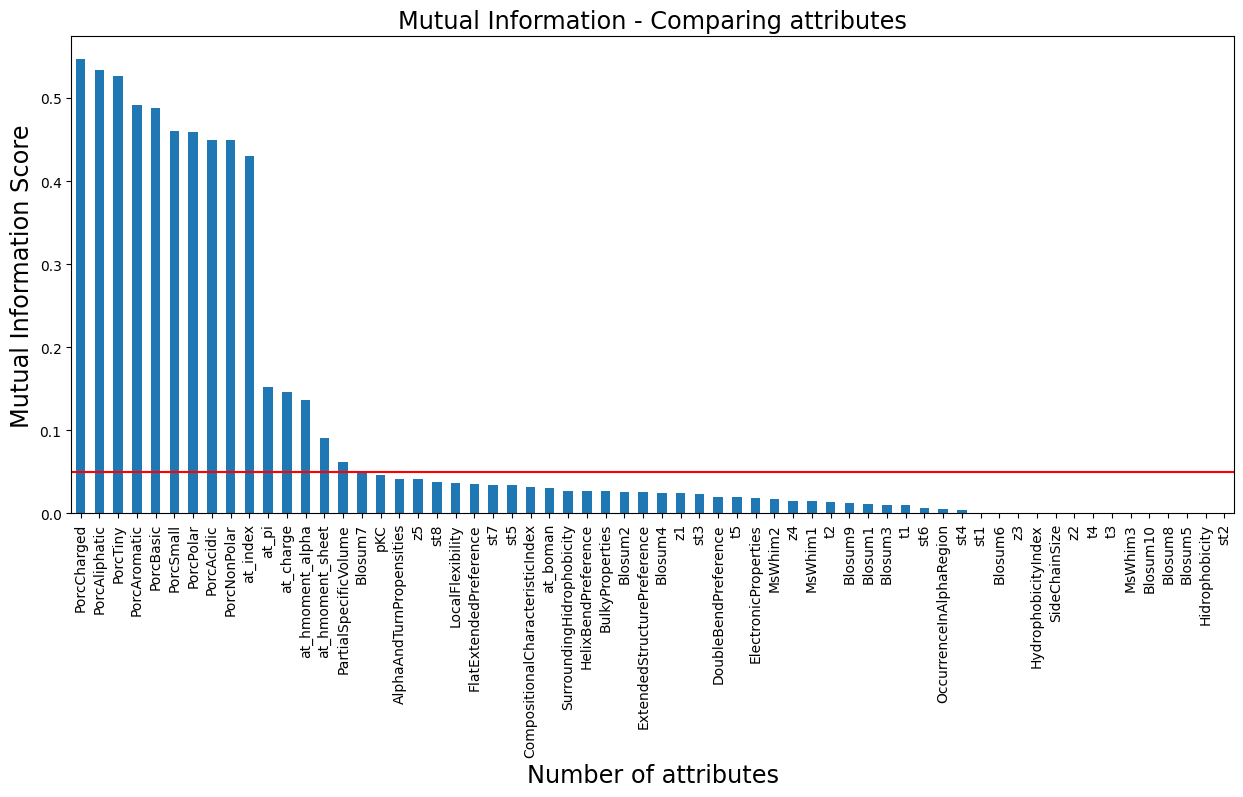

In [51]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

from sklearn.model_selection import train_test_split

feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
fc  = feature_cols
X   = df[fc]
Y   = df.Class

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = fc
mutual_info.sort_values(ascending=False)

mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 9))

plt.axhline(y=0.05, xmin=0.0, xmax=3.5, color='red')

sel_five_cols = SelectKBest(mutual_info_classif, k=62)
sel_five_cols.fit(X_train, y_train)
mutual_info.index[sel_five_cols.get_support()]
plt.subplots_adjust(bottom=0.35)

plt.title("Mutual Information - Comparing attributes",fontsize='xx-large')
plt.xlabel("Number of attributes",fontsize='xx-large')
plt.ylabel("Mutual Information Score",fontsize='xx-large')
plt.savefig('ml-features-MutualInfo.png',pad_inches=1.5)

In [52]:
import warnings
warnings.filterwarnings("ignore")

feature_col=['PorcCharged','PorcAliphatic','PorcTiny', 'PorcAromatic','PorcBasic',
             'PorcPolar','PorcSmall','PorcAcidic','PorcNonPolar','at_index', 
             'at_pi', 'at_charge', 'at_hmoment_alpha','at_hmoment_sheet', 'PartialSpecificVolume', 'Blosum7',
            'pKC','AlphaAndTurnPropensities','z5','st8', 'FlatExtendedPreference','LocalFlexibility','st7','st5','CompositionalCharacteristicIndex',
            'at_boman','Blosum4','HelixBendPreference','BulkyProperties','SurroundingHidrophobicity','Blosum2','Blosum4',
            'ExtendedStructurePreference','z1','st3','t5','DoubleBendPreference','ElectronicProperties','MsWhim1',
            'MsWhim2','t2','z4','Blosum9','Blosum1','Blosum3','t1','st4','st6','OccurrenceInAlphaRegion','st1',
            'MsWhim3','SideChainSize','HydrophobicityIndex','Blosum5','t4','z3','z2','Blosum6','Blosum8','t3',
            'Blosum10','Hidrophobicity','st2']

X=df[feature_col]
Y=df.Class
X_p=preprocessing.normalize(X)
X_Smo,y_Smo=ros.fit_resample(X_p,Y)

graph_acc=[]
V_range = list(range(0, 62)) 
W_range = list(range(0, 100))

Acc = []
Rec = []
Pre = []
Std = []
Mean = []

fc = []
for k in V_range: #veces de atributo
    for l in W_range:
        fc.append(feature_col[k])
        X=df[fc]
        Y=df.Class
        X_p=preprocessing.normalize(X)
        X_Smo,y_Smo=ros.fit_resample(X_p,Y)
        X_train, X_test, y_train, y_test = train_test_split(X_Smo,y_Smo, test_size=0.20)
        dtree=RandomForestClassifier(n_estimators=1000,class_weight="balanced")
    
        dtree.fit(X_train,y_train)
        y_pred = dtree.predict(X_test)
        holi=metrics.accuracy_score(y_test, y_pred)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    #print(np.mean(Acc))
    
    Mean.append(np.mean(Acc))
    Std.append(np.std(Acc))


rango=[]
#print(graph_acc)

for i in V_range:
    rango.append(i+1)
    
import matplotlib.pyplot as plot

plt.bar(rango,Mean,yerr=Std,color="green",width=0.7)
plt.ylabel('Accuracy')
plt.xlabel('Accumulated attributes')
plt.title('Attributes selection')
plt.savefig('Exactitud_segun_atributos_MutualInfo_RF_significativos.png')
plt.show()
#f = io.BytesIO()



KeyboardInterrupt: 

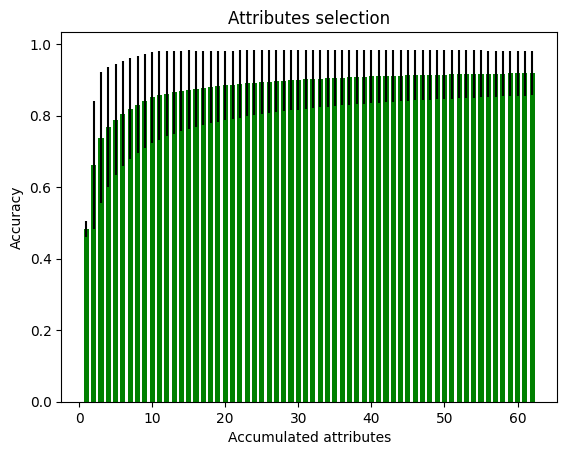

In [54]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

#
feature_col=['PorcCharged','PorcAliphatic','PorcTiny', 'PorcAromatic','PorcBasic','PorcPolar','PorcSmall','PorcAcidic','PorcNonPolar','at_index','at_pi', 'at_charge', 'at_hmoment_alpha','at_hmoment_sheet', 'PartialSpecificVolume', 'Blosum7','pKC','AlphaAndTurnPropensities','z5','st8', 'FlatExtendedPreference','LocalFlexibility','st7','st5','CompositionalCharacteristicIndex','at_boman','Blosum4','HelixBendPreference','SurroundingHidrophobicity','BulkyProperties','Blosum2','ExtendedStructurePreference','z1','st3','t5','DoubleBendPreference','ElectronicProperties','MsWhim1','t2','z4','MsWhim2', 'Blosum1','Blosum9','Blosum3','t1','OccurrenceInAlphaRegion','st6','st4','st1','z2','z3','HydrophobicityIndex','SideChainSize','t4','t3','MsWhim3','Blosum10','Blosum8','Blosum6','Blosum5','Hidrophobicity','st2']

X=df[feature_col]
Y=df.Class
X_p=preprocessing.normalize(X)
X_Smo,y_Smo=ros.fit_resample(X_p,Y)

graph_acc=[]
V_range = list(range(0, 62)) #repeticiones de sets al azar
W_range = list(range(0, 100))
#print(V_range) 62 1,63*
Acc = []
Rec = []
Pre = []
Std = []
Mean = []
#con los 7 mejores descriptores
fc = []
for k in V_range: #veces de atributo
    for l in W_range:
        fc.append(feature_col[k])
        X=df[fc]
        Y=df.Class
        X_p=preprocessing.normalize(X)
        X_Smo,y_Smo=ros.fit_resample(X_p,Y)
        X_train, X_test, y_train, y_test = train_test_split(X_Smo,y_Smo, test_size=0.20)
        svc = RandomForestClassifier(random_state=123, n_estimators=1000) # SVC(random_state=42)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        holi=metrics.accuracy_score(y_test, y_pred)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    #print(np.mean(Acc))
    
    Mean.append(np.mean(Acc))
    Std.append(np.std(Acc))


rango=[]

for i in V_range:
    rango.append(i+1)

import matplotlib.pyplot as plot
plt.bar(rango,Mean,yerr=Std,color="green",width=0.7)
plt.ylabel('Accuracy')
plt.xlabel('Accumulated attributes')
plt.title('Attributes selection')
plt.savefig('Exactitud_segun_atributos_MutualInfo_RF.png')
plt.show()



SVC(probability=True, random_state=123)
GaussianNB(var_smoothing=1e-12)
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.5512037037037038, 0.6325462962962962, 0.9262037037037036, 0.7156944444444445] [0.03212055587531712, 0.03566711256019114, 0.019846159009612965, 0.032454298087228835]
[0.4875545945606644, 0.7236231922851133, 0.9402086399790491, 0.7106412205815511] [0.059225192936708, 0.046280059662776964, 0.0234041088385509, 0.07596513773455202]
[0.5658845027643582, 0.6131654525426463, 0.9146499406073579, 0.7211298463539789] [0.06588422374899139, 0.04637467404468877, 0.030578582543634405, 0.04170185727928253]


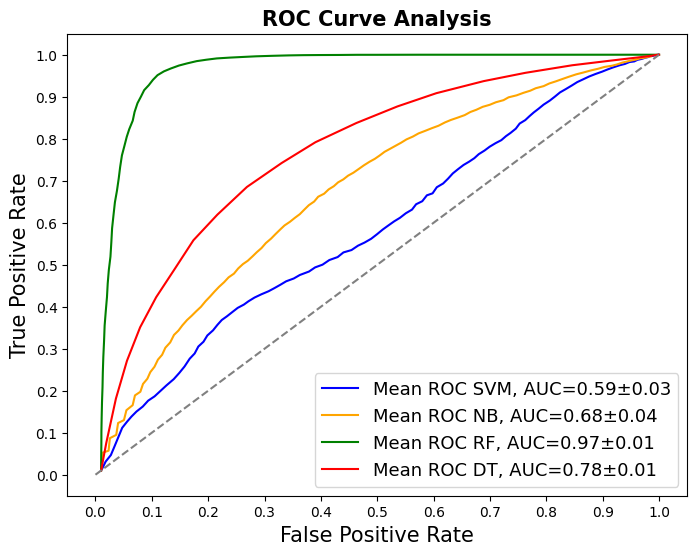

In [55]:
## curva ROC
# Import the classifiers
#from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [SVC(random_state=123, probability=True),
               #LogisticRegression(random_state=1234),
               GaussianNB(var_smoothing=1e-12),
               #KNeighborsClassifier(),
               RandomForestClassifier(random_state=123),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

##ANOVA BEST 20
feature_coll = ['at_hmoment_sheet','st5','PartialSpecificVolume','t3','at_hmoment_alpha','st4','Blosum9','DoubleBendPreference',
               'SurroundingHidrophobicity','Blosum3','PorcBasic','Blosum4','MsWhim3','z3','Blosum7','AlphaAndTurnPropensities',
               'HelixBendPreference','LocalFlexibility','st7','PorcSmall']
graph_acc=[]
Acc = []
Rec = []
Pre = []
acc = []
rec = []
pre = []
acc_std = []
rec_std = []
pre_std = []
Std = []
Mean = []
Fpr = []
Tpr = []
Auc = []
Auc2 = []
Auc3 = []
Auc4 = []
fc = []
mean_tpr=[]

W_range = list(range(0, 100))
X_range = list(range(0, 400, 100))
Y_range = list(range(0, 100,1))

for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:   #repeticiones
        X=df[feature_coll]
        Y=df.Class
        fpr_all=[]
        tpr_all=[]
        X_p=preprocessing.normalize(X)
        X_Smo,y_Smo=ros.fit_resample(X_p,Y)
        X_train, X_test, y_train, y_test = train_test_split(X_Smo,y_Smo, test_size=0.20)
        model = cls.fit(X_train, y_train)
        #print(cls.predict(X))
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   

##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)

fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix2,axis=1)
std_tpr_svm = np.std(matrix2,axis=1)

matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix2,axis=1)
std_tpr_nb = np.std(matrix2,axis=1)

matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix2,axis=1)
std_tpr_rf = np.std(matrix2,axis=1)


matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)
#print(mean_fpr_dt)
#print(std_fpr_dt)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix2,axis=1)
std_tpr_dt = np.std(matrix2,axis=1)
#print(mean_tpr_dt)
#print(std_tpr_dt)

###########

plt.figure(figsize=(8,6))

clasif = ["SVM","NB","RF","DT"]

plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[2]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROC_curve_ANOVA.png')
plt.show()   


SVC(probability=True, random_state=123)
GaussianNB(var_smoothing=1e-12)
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.63625, 0.5886574074074074, 0.9108333333333334, 0.6931944444444444] [0.031312557412556986, 0.03687101097905078, 0.022189597965882955, 0.03396933757172384]
[0.605994445077599, 0.522186244604757, 0.9128115166205926, 0.7084468538624015] [0.05123725683437537, 0.0538557263249401, 0.03101136309363447, 0.08814632500953612]
[0.6472837774178397, 0.6027503383946031, 0.9087706561835934, 0.6862045756925764] [0.04772852097612873, 0.04665174738256543, 0.031288642032203856, 0.04977305602148149]


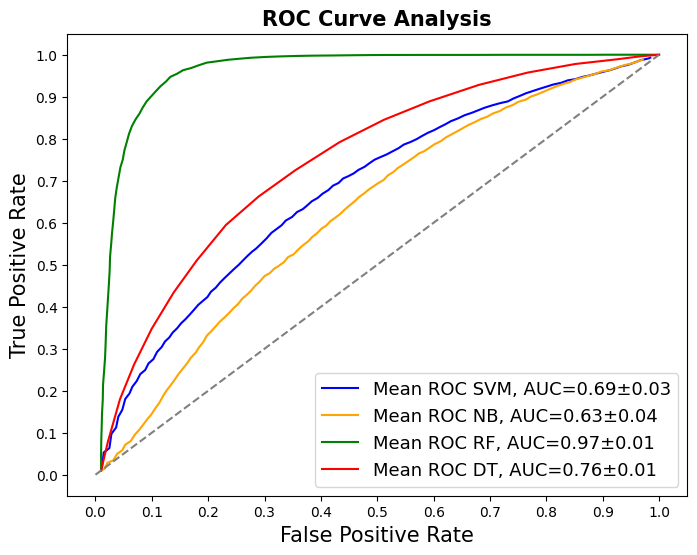

In [56]:
## curva ROC
# Import the classifiers
#from sklearn.linear_model import LogisticRegression
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [SVC(random_state=123, probability=True),
               #LogisticRegression(random_state=1234),
               GaussianNB(var_smoothing=1e-12),
               #KNeighborsClassifier(),
               RandomForestClassifier(random_state=123),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

##ANOVA
feature_coll =['PorcCharged','PorcAliphatic','PorcTiny', 'PorcAromatic','PorcBasic',
             'PorcPolar','PorcSmall','PorcAcidic','PorcNonPolar','at_index']

graph_acc=[]
Acc = []
Rec = []
Pre = []
acc = []
rec = []
pre = []
acc_std = []
rec_std = []
pre_std = []
Std = []
Mean = []
Fpr = []
Tpr = []
Auc = []
Auc2 = []
Auc3 = []
Auc4 = []
fc = []
mean_tpr=[]

W_range = list(range(0, 100))
X_range = list(range(0, 400, 100))
Y_range = list(range(0, 100,1))
#con los 50 mejores descriptores acumulado
for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:   #repeticiones
        X=df[feature_coll]
        Y=df.Class
        fpr_all=[]
        tpr_all=[]
        X_p=preprocessing.normalize(X)
        X_Smo,y_Smo=ros.fit_resample(X_p,Y)
        X_train, X_test, y_train, y_test = train_test_split(X_Smo,y_Smo, test_size=0.20)
        model = cls.fit(X_train, y_train)
        #print(cls.predict(X))
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        #Fpr.append(fpr)
        #Tpr.append(tpr)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   

##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)

fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)
#print(mean_fpr_svm)
#print(std_fpr_svm)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix2,axis=1)
std_tpr_svm = np.std(matrix2,axis=1)
#print(mean_tpr_svm)
#print(std_tpr_svm)

matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)
#print(mean_fpr_nb)
#print(std_fpr_nb)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_nb = np.mean(matrix2,axis=1)
std_tpr_nb = np.std(matrix2,axis=1)


matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix2,axis=1)
std_tpr_rf = np.std(matrix2,axis=1)


matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)


matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix2,axis=1)
std_tpr_dt = np.std(matrix2,axis=1)


###########

plt.figure(figsize=(8,6))

clasif = ["SVM","NB","RF","DT"]

plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[2]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROC_curve_MUTUAL-INFO.png')
plt.show()  

# MIX


SVC(probability=True, random_state=123)
GaussianNB(var_smoothing=1e-12)
RandomForestClassifier(random_state=123)
DecisionTreeClassifier(min_samples_split=100, random_state=123)
[0.5972222222222222, 0.6417592592592593, 0.930138888888889, 0.71375] [0.027591971158798786, 0.03263005527952077, 0.02026588311716315, 0.040142146050937036]
[0.5710036027577658, 0.6489800169043926, 0.9461737856387993, 0.7378623406098243] [0.059433271916183486, 0.05101465472696714, 0.023347412098811058, 0.0829032159313733]
[0.6033031819065883, 0.6392319462579777, 0.9164167776309785, 0.7066626214212083] [0.049085159160898416, 0.05181921629134835, 0.03306535025443686, 0.05062778804383621]


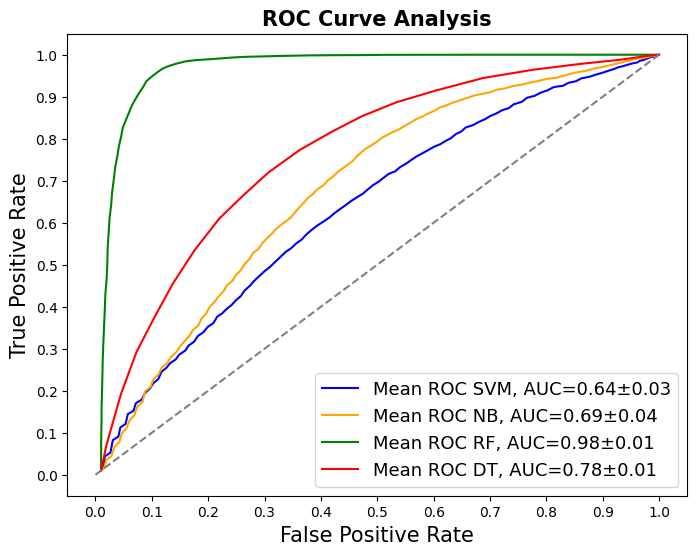

In [57]:
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [SVC(random_state=123, probability=True),
               #LogisticRegression(random_state=1234),
               GaussianNB(var_smoothing=1e-12),
               #KNeighborsClassifier(),
               RandomForestClassifier(random_state=123),
               DecisionTreeClassifier(random_state=123,min_samples_split=100)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

##ANOVA y MUTUAL INFO
feature_coll = ['at_hmoment_sheet','st5','PartialSpecificVolume','t3','at_hmoment_alpha','st4','Blosum9','DoubleBendPreference',
               'SurroundingHidrophobicity','Blosum3','PorcBasic','Blosum4','MsWhim3','z3','Blosum7','AlphaAndTurnPropensities',
               'HelixBendPreference','LocalFlexibility','st7','PorcSmall',
               'PorcCharged','PorcAliphatic','PorcTiny', 'PorcAromatic',
               'PorcPolar','PorcAcidic','PorcNonPolar','at_index']
#PorcBasic REPETIDO


graph_acc=[]
Acc = []
Rec = []
Pre = []
acc = []
rec = []
pre = []
acc_std = []
rec_std = []
pre_std = []
Std = []
Mean = []
Fpr = []
Tpr = []
Auc = []
Auc2 = []
Auc3 = []
Auc4 = []
fc = []
mean_tpr=[]

W_range = list(range(0, 100))
X_range = list(range(0, 400, 100))
Y_range = list(range(0, 100,1))
#con los 50 mejores descriptores acumulado
for cls in classifiers: #por cada clasificador
    print(cls)
    for i in W_range:   #repeticiones
        X=df[feature_coll]
        Y=df.Class
        fpr_all=[]
        tpr_all=[]
        X_p=preprocessing.normalize(X)
        X_Smo,y_Smo=ros.fit_resample(X_p,Y)
        X_train, X_test, y_train, y_test = train_test_split(X_Smo,y_Smo, test_size=0.20)
        model = cls.fit(X_train, y_train)
        #print(cls.predict(X))
        y_pred = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)
        #Fpr.append(fpr)
        #Tpr.append(tpr)
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round()))
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc))
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    Auc=[]
    Acc=[]
    Rec=[]
    Pre=[]   

##IMPRESION DE TABLA
print(acc,acc_std)
print(rec,rec_std)
print(pre,pre_std)

fpr_svm=result_table['fpr'][0:99]
fpr_nb =result_table['fpr'][100:199]
fpr_rf =result_table['fpr'][200:299]
fpr_dt =result_table['fpr'][300:399]
tpr_svm=result_table['tpr'][0:99]
tpr_nb =result_table['tpr'][100:199]
tpr_rf =result_table['tpr'][200:299]
tpr_dt =result_table['tpr'][300:399]

fpr_svm=fpr_svm.to_list()
fpr_nb =fpr_nb.to_list()
fpr_rf =fpr_rf.to_list()
fpr_dt =fpr_dt.to_list()
tpr_svm=tpr_svm.to_list()
tpr_nb =tpr_nb.to_list()
tpr_rf =tpr_rf.to_list()
tpr_dt =tpr_dt.to_list()

matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix2,axis=1)
std_tpr_svm = np.std(matrix2,axis=1)

matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_nb = np.mean(matrix2,axis=1)
std_tpr_nb = np.std(matrix2,axis=1)

matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix2,axis=1)
std_tpr_rf = np.std(matrix2,axis=1)

matrix=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

matrix2=np.zeros((110,100))
for i in np.arange(0,110,1):
    for j in np.arange(0,100,1):
        matrix2[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 110: #columnas
            matrix2[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix2,axis=1)
std_tpr_dt = np.std(matrix2,axis=1)

###########

plt.figure(figsize=(8,6))

clasif = ["SVM","NB","RF","DT"]

plt.plot(mean_fpr_svm,mean_tpr_svm,color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='orange', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_rf, mean_tpr_rf, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='red', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[2]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROC_curve_ANOVA_MUTUAL-INFO.png')
plt.show()